In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
car_data = pd.read_csv('../Documents/data_set/Main_User_Interface/1.14MHz Data/Features/car.csv')
human_data = pd.read_csv('../Documents/data_set/Main_User_Interface/1.14MHz Data/Features/human.csv')
pillar_data = pd.read_csv('../Documents/data_set/Main_User_Interface/1.14MHz Data/Features/pillar.csv')
wall_data = pd.read_csv('../Documents/data_set/Main_User_Interface/1.14MHz Data/Features/wall.csv')

print('Car:',car_data.shape)
print('Human:',human_data.shape)
print('Pillar:',pillar_data.shape)
print('Wall:',wall_data.shape)

Car: (7640, 40)
Human: (9791, 40)
Pillar: (5791, 40)
Wall: (5506, 40)


In [3]:
car = car_data.loc[car_data['type'] == 'CAR'].iloc[:,4:]
human = human_data.loc[human_data['type'] == 'HUMAN'].iloc[:,4:]
pillar = pillar_data.loc[pillar_data['type'] == 'PILLAR'].iloc[:,4:]
wall = wall_data.loc[wall_data['type'] == 'WALL'].iloc[:,4:]

In [4]:
X = car.values.tolist() + human.values.tolist() + pillar.values.tolist() + wall.values.tolist()
y = ['CAR']*car.shape[0] + ['HUMAN']*human.shape[0] + ['PILLAR']*pillar.shape[0] + ['WALL']*wall.shape[0]

print("Car: ",len(car))
print("Human: ",len(human))
print("Pillar: ",len(pillar))
print("Wall: ",len(wall))
result = len(car) + len(human) + len(pillar) + len(wall)
print("Total data:", result)

Car:  7640
Human:  9791
Pillar:  5791
Wall:  5506
Total data: 28728


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('X train data : ', np.array(X_train).shape)
print('X test data : ', np.array(X_test).shape)
print('y train data : ', np.array(y_train).shape)
print('y test data : ', np.array(y_test).shape)

X train data :  (19247, 36)
X test data :  (9481, 36)
y train data :  (19247,)
y test data :  (9481,)


In [6]:
from sklearn import preprocessing
normalized_X_train = preprocessing.normalize(X_train)
normalized_X_test = preprocessing.normalize(X_test)

In [10]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt  

def plot_confusionMatrix(y_test, result, labels = ['CAR', 'HUMAN', 'PILLAR', 'WALL']):
    cm = confusion_matrix(y_test, result)
#     print(cm)
    sum = np.sum(cm) 
    score = accuracy_score(y_test, result)
    
    precision_CLASS_A =  np.around(precision_score(y_test, result, average=None,pos_label=labels[0]), decimals=2)
#     precision_CLASS_A =  (precision_score(y_test, result, average=None,pos_label=labels[0]))
#     precision_CLASS_B = precision_score(y_test, result, average=None,pos_label=labels[1])
#     precision_CLASS_C = precision_score(y_test, result, average=None,pos_label=labels[2])
#     precision_CLASS_D = precision_score(y_test, result, average=None,pos_label=labels[3])
    
    recall_CLASS_A = np.around(recall_score(y_test, result, average=None,pos_label=labels[0]), decimals=2)
#     recall_CLASS_B = (recall_score(y_test, result, average=None,pos_label=labels[1]))
#     recall_CLASS_C = (recall_score(y_test, result, average=None,pos_label=labels[2]))
#     recall_CLASS_D = (recall_score(y_test, result, average=None,pos_label=labels[3]))

    print('Precision: Class A',precision_CLASS_A)
#     print('Precision: Class B',precision_CLASS_B)
#     print('Precision: Class C',precision_CLASS_C)
#     print('Precision: Class D',precision_CLASS_D)
    
    print('Recall: Class A',recall_CLASS_A)
#     print('Recall: Class B',recall_CLASS_B)
#     print('Recall: Class C',recall_CLASS_C)
#     print('Recall: Class D',recall_CLASS_D)

    cm_new = np.append(cm[0], recall_CLASS_A[0])
    cm_new2 = np.append(cm[1], recall_CLASS_A[1])
    cm_new3 = np.append(cm[2], recall_CLASS_A[2])
    cm_new4 = np.append(cm[3], recall_CLASS_A[3])
    cm_new5 = np.array([precision_CLASS_A[0], precision_CLASS_A[1], precision_CLASS_A[2], precision_CLASS_A[3], score])
    cm = np.array([cm_new,cm_new2, cm_new3,cm_new4,cm_new5])
    
    
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(cm, annot=True, ax = ax,linewidths=.5,fmt='g',cmap="Greens"); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title(title); 
    counter = 0
    for i in range(0,4):
        for j in range(0,5):
            percentage = cm[i,j]/sum
            t = ax.texts[counter]
            if j == 4:
                t.set_text(str(cm[i,j]))
            else:
                t.set_text(str(cm[i,j]) + '\n' + str(round(percentage*100,2)) + " %")
            counter = counter + 1

    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels);

[[2475    6    9    0]
 [  56 3205   31    2]
 [   1   15 1904    1]
 [   0    6    2 1768]]
Accuracy:  0.9863938403122033
Precision: Class A [0.98 0.99 0.98 1.  ]
Recall: Class A [0.99 0.97 0.99 1.  ]


C:\Users\kamal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'CAR') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


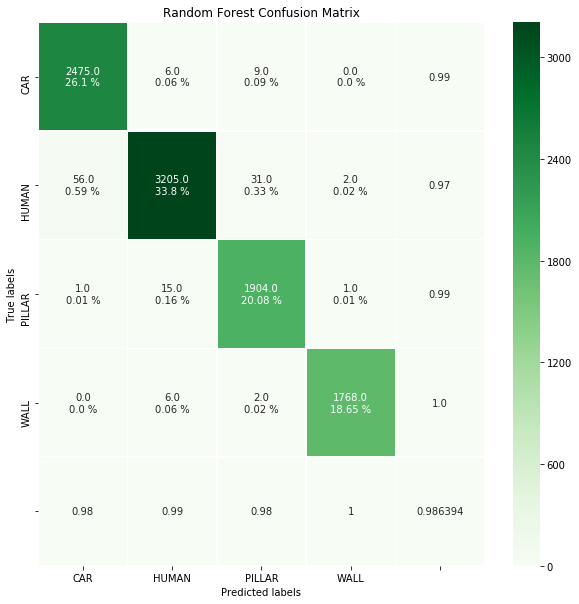

In [11]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(normalized_X_train, y_train)
result = clf.predict(normalized_X_test)

cm = confusion_matrix(y_test, result)
print(cm)
print("Accuracy: ",accuracy_score(y_test, result))
title = ('Random Forest Confusion Matrix')
plot_confusionMatrix(y_test, result)

[[2487    2    1    0]
 [ 157 3078   49   10]
 [   0    4 1916    1]
 [   0    0    0 1776]]
Accuracy:  0.976373800232043
Precision: Class A [0.94 1.   0.97 0.99]


C:\Users\kamal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'CAR') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Recall: Class A [1.   0.93 1.   1.  ]


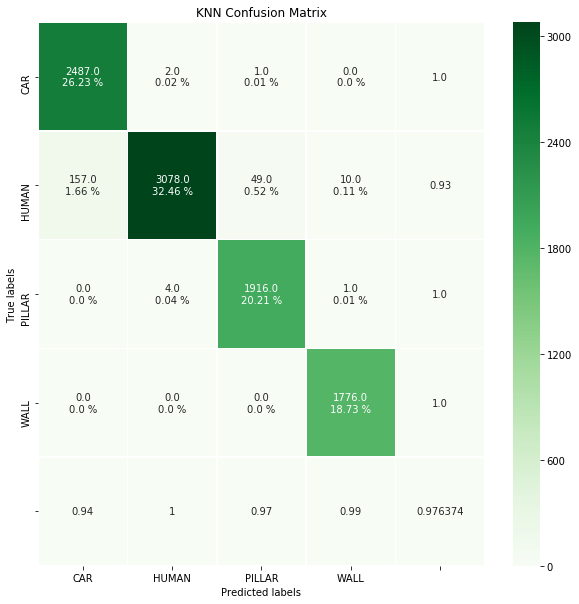

In [12]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(normalized_X_train, y_train)
result = clf.predict(normalized_X_test)

cm = confusion_matrix(y_test, result)
print(cm)
print("Accuracy: ",accuracy_score(y_test, result))
title = ('KNN Confusion Matrix')
plot_confusionMatrix(y_test, result)

In [13]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D, Conv2D
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

label_encoder = LabelEncoder()
label_encoded = label_encoder.fit_transform(y)

train_X, test_X, train_y, test_y = train_test_split(X, label_encoded, test_size=0.33, random_state=42)

Using TensorFlow backend.


In [14]:
from sklearn import preprocessing
normalized_X_train = preprocessing.normalize(train_X)
normalized_X_test = preprocessing.normalize(test_X)

train_X = np.array(normalized_X_train)[:,6:31].reshape(-1,5,5,1)
test_X =  np.array(normalized_X_test)[:,6:31].reshape(-1,5,5,1)

train_X.shape, test_X.shape

((19247, 5, 5, 1), (9481, 5, 5, 1))

In [15]:
classes = np.unique(train_y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

train_X.shape, test_X.shape, train_y.shape, test_y.shape

Total number of outputs :  4
Output classes :  [0 1 2 3]


((19247, 5, 5, 1), (9481, 5, 5, 1), (19247,), (9481,))

In [16]:
from keras.utils import to_categorical

# Change the labels from categorical to one-hot encoding
train_Y_one_hot = keras.utils.to_categorical(train_y)
test_Y_one_hot = keras.utils.to_categorical(test_y)

# Display the change for category label using one-hot encoding
print('Original label:', train_y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

print(train_Y_one_hot.shape)
print(test_Y_one_hot.shape)

Original label: 2
After conversion to one-hot: [0. 0. 1. 0.]
(19247, 4)
(9481, 4)


In [17]:
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.3, random_state=13)
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((13472, 5, 5, 1), (5775, 5, 5, 1), (13472, 4), (5775, 4))

In [18]:
from keras.models import Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

epochs = 50
num_classes = 4

model = Sequential()

model.add(Conv2D(128, kernel_size=(2, 2),input_shape=(5,5,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2),padding='same'))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 4, 4, 128)         640       
_________________________________________________________________
activation_1 (Activation)    (None, 4, 4, 128)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 2052      
Total params: 2,692
Trainable params: 2,692
Non-trainable params: 0
_________________________________________________________________


In [20]:
train_dropout = model.fit(train_X, train_label,epochs=epochs,validation_data=(valid_X, valid_label))

Train on 13472 samples, validate on 5775 samples
Epoch 1/50
13472/13472 [==============================] - 2s 170us/step - loss: 1.2908 - accuracy: 0.3620 - val_loss: 1.1784 - val_accuracy: 0.5569
Epoch 2/50
13472/13472 [==============================] - 2s 149us/step - loss: 1.0711 - accuracy: 0.5917 - val_loss: 0.9597 - val_accuracy: 0.6521
Epoch 3/50
13472/13472 [==============================] - 2s 148us/step - loss: 0.8987 - accuracy: 0.6721 - val_loss: 0.8328 - val_accuracy: 0.6909
Epoch 4/50
13472/13472 [==============================] - 2s 171us/step - loss: 0.7915 - accuracy: 0.7107 - val_loss: 0.7470 - val_accuracy: 0.7098
Epoch 5/50
13472/13472 [==============================] - 2s 176us/step - loss: 0.7188 - accuracy: 0.7356 - val_loss: 0.6899 - val_accuracy: 0.7487
Epoch 6/50
13472/13472 [==============================] - 2s 172us/step - loss: 0.6627 - accuracy: 0.7591 - val_loss: 0.6575 - val_accuracy: 0.7642
Epoch 7/50
13472/13472 [==============================] - 2s 16

In [21]:
predicted_classes = model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, test_y.shape

((9481,), (9481,))

[[2368   75   46    1]
 [ 325 2857   64   48]
 [ 143    8 1749   21]
 [  17    2    8 1749]]
0.9200506275709314
Precision: Class A [0.83 0.97 0.94 0.96]
Recall: Class A [0.95 0.87 0.91 0.98]


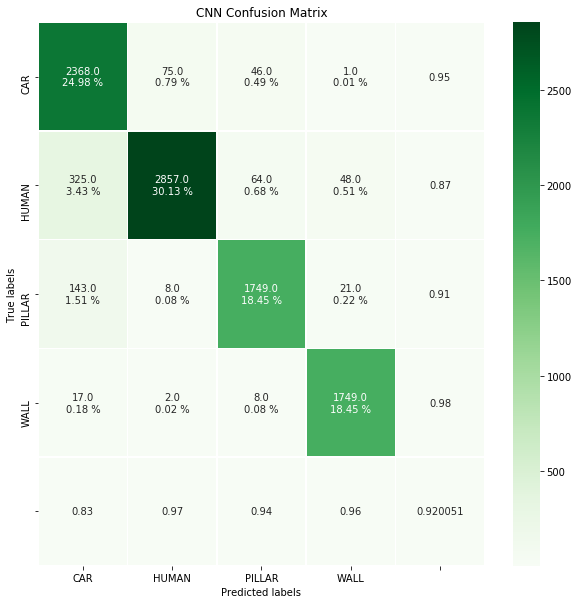

In [23]:
cm = confusion_matrix(test_y, predicted_classes)
print(cm)
print(accuracy_score(test_y, predicted_classes))
title = ('CNN Confusion Matrix')
plot_confusionMatrix(test_y, predicted_classes)

In [24]:
# Implementation of PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 12, whiten='True')
pca_x = pca.fit(X).transform(X)
pca_x.shape

(28728, 12)

In [25]:
train_X, test_X, train_y, test_y = train_test_split(pca_x, y, test_size=0.33, random_state=42)

print('X train data:', np.array(train_X).shape)
print('X test data:', np.array(test_X).shape)
print('y train data:', np.array(train_y).shape)
print('y test data:', np.array(test_y).shape)
from sklearn import preprocessing
normalized_X_train = preprocessing.normalize(train_X)
normalized_X_test = preprocessing.normalize(test_X)

X train data: (19247, 12)
X test data: (9481, 12)
y train data: (19247,)
y test data: (9481,)


[[2488    0    2    0]
 [  21 3255   16    2]
 [   3   19 1899    0]
 [   0    1    0 1775]]
Accuracy:  0.9932496572091551
Precision: Class A [0.99 0.99 0.99 1.  ]
Recall: Class A [1.   0.99 0.99 1.  ]


C:\Users\kamal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'CAR') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


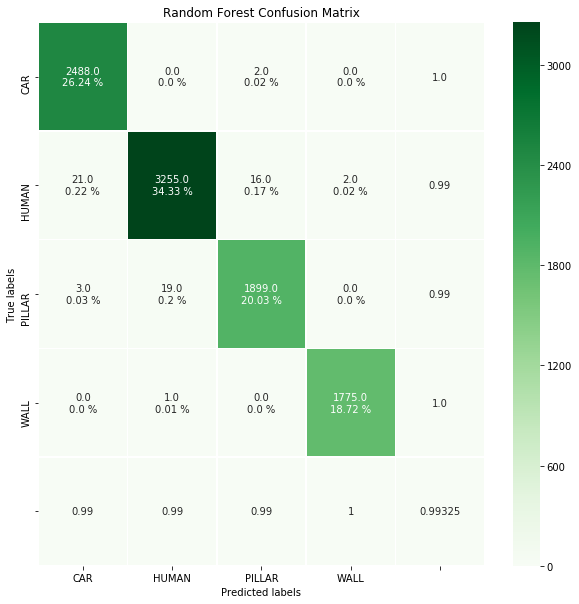

In [26]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(normalized_X_train, y_train)
result = clf.predict(normalized_X_test)

cm = confusion_matrix(y_test, result)
print(cm)
print("Accuracy: ",accuracy_score(y_test, result))
title = ('Random Forest Confusion Matrix')
plot_confusionMatrix(y_test, result)

[[2490    0    0    0]
 [  36 3239   13    6]
 [   2    8 1911    0]
 [   0    0    0 1776]]
Accuracy:  0.9931441831030482
Precision: Class A [0.98 1.   0.99 1.  ]
Recall: Class A [1.   0.98 0.99 1.  ]


C:\Users\kamal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'CAR') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


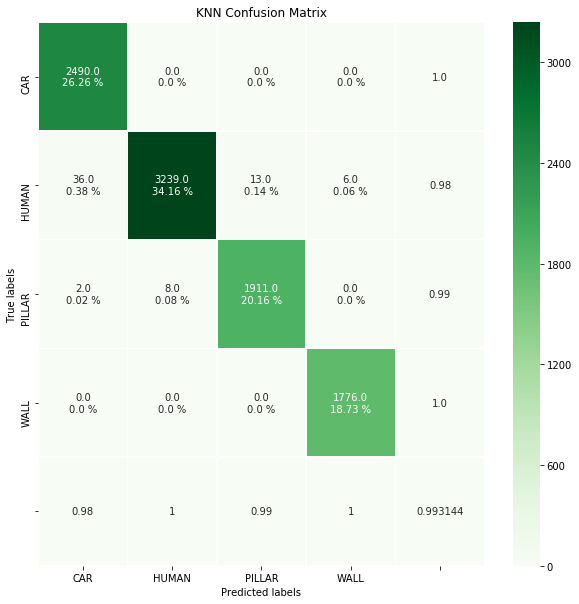

In [27]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(normalized_X_train, y_train)
result = clf.predict(normalized_X_test)

cm = confusion_matrix(y_test, result)
print(cm)
print("Accuracy: ",accuracy_score(y_test, result))
title = ('KNN Confusion Matrix')
plot_confusionMatrix(y_test, result)